In [36]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

titanic = sns.load_dataset('titanic')

In [37]:
titanic.info(), titanic.describe(), titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


(None,
          survived      pclass         age       sibsp       parch        fare
 count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
 mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
 std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
 min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
 25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
 50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
 75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
 max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200,
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
 0         0       3    male  22.0      1      0   7.2500        S  Third   
 1         1       1  female  38.0      1      0  71.2833        C  First   
 2         1       3  female  26.0      0      0  

In [38]:
df = titanic.drop(['sibsp','parch','fare','embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], axis='columns')

In [39]:
df = df.dropna()

In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['sex'] = encoder.fit_transform(df['sex'])
df['sex'] = encoder.fit_transform(~df['sex'])

In [42]:
X = df.drop(['survived'], axis='columns')
y = df.survived

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [51]:
# sans gridSearchCV avec boucle for

k =1
k_best = 0

for i in range(k, 20):
    evalKNN = cross_val_score(KNeighborsClassifier(i) , X_train, y_train, cv=5).mean()
    
    if evalKNN > k_best :
        k_best = evalKNN
    
print(k_best)

model = KNeighborsClassifier(k_best)

0.7391151792524789


C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


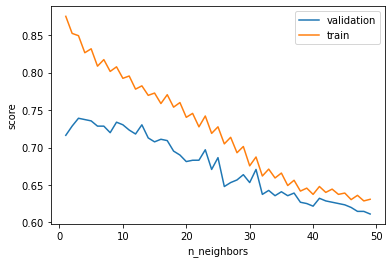

In [61]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

# graphiquement

model2 = KNeighborsClassifier()

k = np.arange(1, 50)

train_score, val_score = validation_curve(model2, X_train, y_train, 'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label = 'validation')
plt.plot(k, train_score.mean(axis=1), label = 'train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [67]:
param_grid = {
    'n_neighbors': np.arange(1,20),
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

grid.fit(X_train, y_train)

grid.best_score_, grid.best_params_

(0.7688939740655988,
 {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'})

In [70]:
best_model = grid.best_estimator_

In [71]:
best_model.score(X_test, y_test)

0.8041958041958042

In [72]:
from sklearn.model_selection import learning_curve

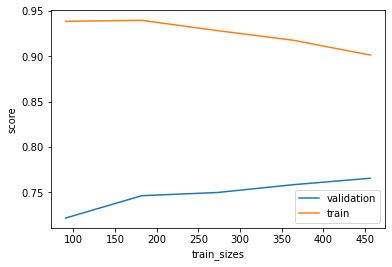

In [77]:
N, train_score, val_score = learning_curve(best_model, X_train, y_train, train_sizes= np.linspace(0.2, 1.0, 5))

plt.plot(N, val_score.mean(axis=1), label = 'validation')
plt.plot(N, train_score.mean(axis=1), label = 'train')

plt.ylabel('score')
plt.xlabel('train_sizes')
plt.legend()

# effectivement avoir plus de points aiderait grandement

In [177]:
from sklearn.linear_model import SGDClassifier, LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

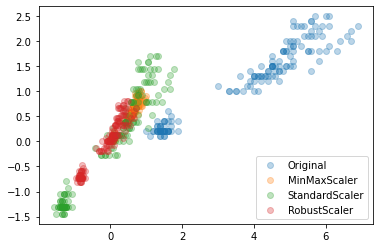

In [178]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_minmax = MinMaxScaler().fit_transform(X)
X_std = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:,2], X[:,3], alpha = 0.3, label='Original')
plt.scatter(X_minmax[:,2], X_minmax[:,3], alpha = 0.3, label='MinMaxScaler')
plt.scatter(X_std[:,2], X_std[:,3], alpha = 0.3, label='StandardScaler')
plt.scatter(X_robust[:,2], X_robust[:,3], alpha = 0.3, label='RobustScaler')

plt.legend()

In [179]:
model = make_pipeline(PolynomialFeatures(),
                     StandardScaler(),
                     SGDClassifier(random_state=5))

params ={
    'polynomialfeatures__degree':[2,3,4],
    'sgdclassifier__penalty':['l1', 'l2']
}

grid = GridSearchCV(model, param_grid= params ,cv=4)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.9666666666666667,
 {'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l1'})

je choisirai StandardScaler parce cela aide pour avoir une distribution standard (moyenne = 0 et ecart type de 1).


# titanic partie 2

In [242]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [243]:
X = titanic.drop(['sibsp','parch','fare','embarked', 'class', 'who', 'adult_male', 'deck', 
                  'embark_town', 'alive', 'alone', 'survived'], axis='columns')
y = titanic.survived


In [244]:
ohe = OneHotEncoder()
knni = KNNImputer(2)
rs = RobustScaler()

preprocessor = make_column_transformer(
    (make_pipeline(knni, ohe), ['pclass']),
    (make_pipeline(SimpleImputer(strategy='mean'),rs), ['age']),
    (make_pipeline(SimpleImputer(strategy='most_frequent'),ohe), ['sex'])
)


C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass missing_values=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [245]:
params ={
    'sgdclassifier__penalty':['l1', 'l2']
}

In [246]:
grid = GridSearchCV(make_pipeline(preprocessor, SGDClassifier(random_state=4)), param_grid=params, cv = 5)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('knnimputer',
                                                                                          KNNImputer(missing_values=2)),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['pclass']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
   

In [248]:
grid.best_score_, grid.best_params_

(0.7766177484487343, {'sgdclassifier__penalty': 'l1'})

In [249]:
ohe = OneHotEncoder()
knni = KNNImputer(2)
rs = RobustScaler()
ss = StandardScaler()

preprocessor = make_column_transformer(
    (make_pipeline(knni, ohe), ['pclass']),
    (make_pipeline(SimpleImputer(strategy='mean'),ss), ['age']),
    (make_pipeline(SimpleImputer(strategy='most_frequent'),ohe), ['sex'])
)
model = make_pipeline(preprocessor, SGDClassifier(random_state=4))

def find_best_model_using_gridsearchcv(X,y):
    preprocessor = make_column_transformer(
    (make_pipeline(knni, ohe), ['pclass']),
    (make_pipeline(SimpleImputer(strategy='mean'),rs), ['age']),
    (make_pipeline(SimpleImputer(strategy='most_frequent'),ohe), ['sex'])
    )
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'linearregression__normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'lasso__alpha': [1,2],
                'lasso__selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'decisiontreeregressor__criterion' : ['mse','friedman_mse'],
                'decisiontreeregressor__splitter': ['best','random']
            }
        },
        'sgd_classifier': {
            'model': SGDClassifier(),
            'params': {
                'sgdclassifier__penalty':['l1', 'l2']
            }
        
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(make_pipeline(preprocessor, config['model']), config['params'], cv=cv, return_train_score=False)
        
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass missing_values=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [250]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.360963,{'linearregression__normalize': False}
1,lasso,-0.002581,"{'lasso__alpha': 1, 'lasso__selection': 'random'}"
2,decision_tree,0.233730,{'decisiontreeregressor__criterion': 'friedman...
3,sgd_classifier,0.763128,{'sgdclassifier__penalty': 'l1'}


 stochastic gradient descent look the best with a quick analysis maybe we should try different encoder but they look fine...